# Part I - (Prosper Loan Dataset)

## By: CHIBUIKE HENRY AZUBUIKE

## Introduction

> This dataset contains 113,937 loans with 81 varibles on each loan, including loan amount, borrower state, employment status, stated monthly income, credit scores of the borrowers, amongst many others. I'll be exploring this loan data in order to get more clarity on major reason(s) why people take loan, their categories or states, and major contributing factors that facilitate loans.
  


## Preliminary Wrangling


In [83]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [84]:
loan = pd.read_csv('prosperLoanData.csv')
pd.options.display.max_columns = 9999
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [85]:
loan.groupby('BorrowerState')['OnTimeProsperPayments'].mean().sort_values()

BorrowerState
IA    10.866667
ME    11.555556
ND    13.000000
SD    14.257143
RI    15.494382
HI    18.242857
KY    18.284211
NV    18.534392
NJ    18.643636
DC    19.021739
PA    19.083176
AK    19.319149
WY    19.419355
WV    19.531646
NH    19.800000
NY    19.955108
KS    20.251208
LA    20.433962
VA    20.593794
TN    20.637602
VT    20.710526
AZ    20.828125
SC    20.969432
CT    21.120370
WI    21.180662
AR    21.548387
MD    21.727731
MS    21.900621
DE    22.117647
NC    22.348228
FL    22.353901
AL    22.412104
IL    22.490566
TX    22.626549
MA    23.096774
IN    23.124700
CA    23.198273
MO    23.249595
OH    23.307229
MT    23.619048
OR    23.686775
WA    24.009358
CO    24.055446
MI    24.201743
GA    24.307625
MN    24.388889
NE    24.537931
UT    24.811594
ID    25.100775
OK    25.205000
NM    25.580247
Name: OnTimeProsperPayments, dtype: float64

In [86]:
loan.shape

(113937, 81)

In [87]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> The dataset consists of 113,937 observations and 81 variables describing each observation, most of which exists as float data types and a bit of object and integer data types. some of these variables include loan status, occupation, debt to income ratio, stated monthly income, original loan amount, and so on.

### What is/are the main feature(s) of interest in your dataset?

> I would like to explore the major reason(s) why people take loan, their categories or states, and major contributing factors that facilitate loans

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I do think that the following variables should be able to help me properly explore my main feature(s) in the dataset: 
ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, DebtToIncomeRatio, IncomeRange, StatedMonthlyIncome, LoanOriginalAmount, LoanOriginationQuarter, CreditScoreRangeLower, CreditScoreRangeUpper

## Univariate Exploration

> For the exploration of my dataset, I would first like to drop off columns that I think won't be of help to investigation into my feature(s) of interest before going into my univariate exploration



Picking out columns of interest and adding an additional column header of  'AvgCreditScore'

In [88]:
loan['AvgCreditScore'] = (loan['CreditScoreRangeLower'] + loan['CreditScoreRangeUpper'])/2


In [89]:
loan1 = loan[['ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationQuarter', 'AvgCreditScore']]

In [90]:
loan1.head()

,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationQuarter,AvgCreditScore
0,0,CO,Other,Self-employed,0.17,"$25,000-49,999",3083.333333,9425,Q3 2007,649.5
1,2,CO,Professional,Employed,0.18,"$50,000-74,999",6125.000000,10000,Q1 2014,689.5
2,0,GA,Other,Not available,0.06,Not displayed,2083.333333,3001,Q1 2007,489.5
3,16,GA,Skilled Labor,Employed,0.15,"$25,000-49,999",2875.000000,10000,Q4 2012,809.5
4,2,MN,Executive,Employed,0.26,"$100,000+",9583.333333,15000,Q3 2013,689.5


> 1. I would like to start by Exploring the distribution pattern of the average credit scores

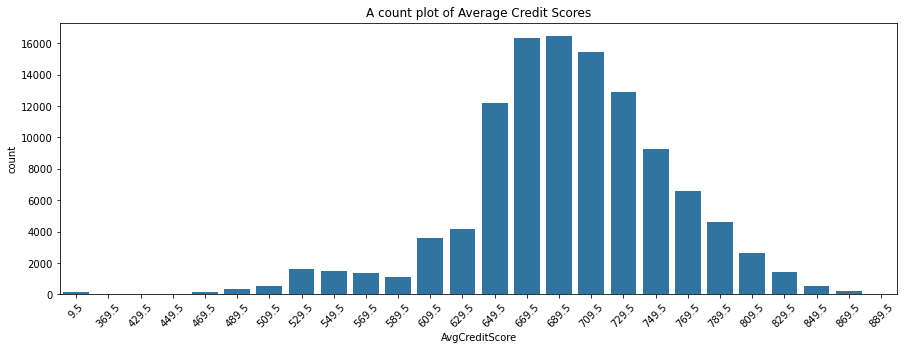

In [91]:
# A count plot of Average Credit Scores

plt.figure(figsize=[15, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'AvgCreditScore', color = default_color)
plt.xticks(rotation =45)
plt.title('A count plot of Average Credit Scores')
plt.show()

The average credit score represents the mean value of the upper and lower credit score limits of each applicant.

The count plot reveals that the average creditscores appears to be some what of a normal distribution with most data points centered around 650 to 750, but it is also a bit skewed to the left.

> 2. Next up is Exploring the various employment status of the borrowers recorded at the time of listing

In [92]:
loan['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

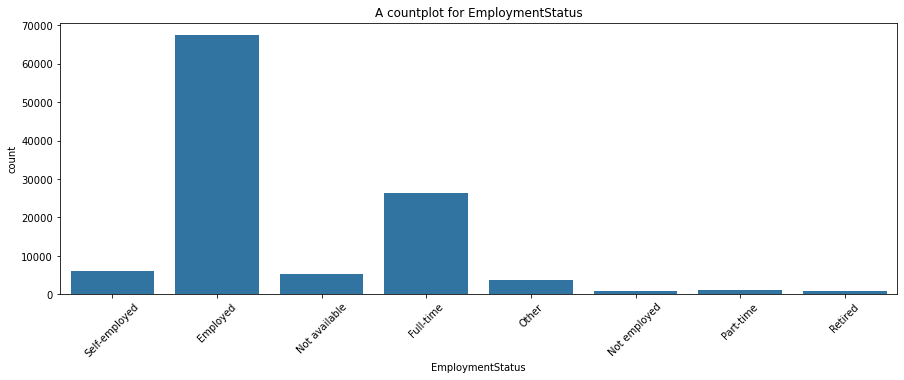

In [93]:
# A countplot for 'EmploymentStatus' 

plt.figure(figsize=[15, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'EmploymentStatus', color = default_color)
plt.xticks(rotation =45)
plt.title('A countplot for EmploymentStatus')
plt.show()

The distribution shows that a very vast amount of applicants in the dataset are employed, and this only makes sense considering the fact that the loan has to be paid back and as such, applicants should have a steady source of income. 

> 3. Exploring income range of applicants at the time of listing

In [94]:
loan.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

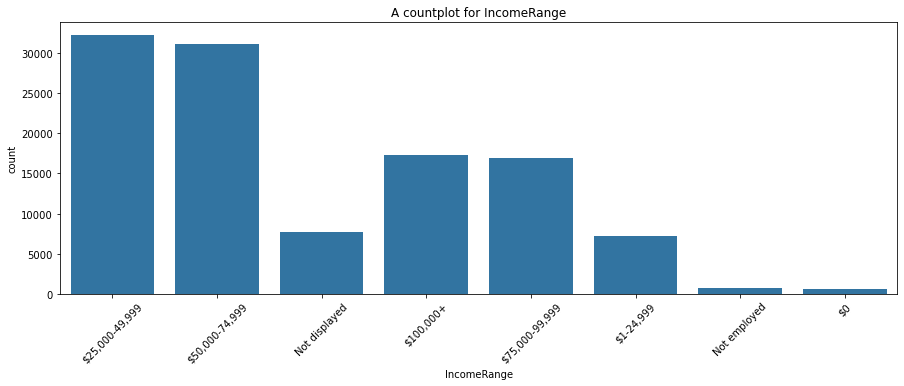

In [95]:
# A countplot for 'IncomeRange' 

plt.figure(figsize=[15, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'IncomeRange', color = default_color)
plt.xticks(rotation =45)
plt.title('A countplot for IncomeRange')
plt.show()


From the plot above, most persons present in the dataset fall within a salary income range of 25,000 to 49,999 USD and 50,000 to 74,999 USD; Next to this was the salary income range between 75,000 to 99,999 USD and those earning 100,000 USD and above. 
This goes to show that most persons from the data set are average salary earners earning within the range of 25,000 to 75,000 USD annually. 

> 4. Exploring the various periods (quartertly) when each loan application was taken/originated, to observe the disrtribution of loan applications over the years

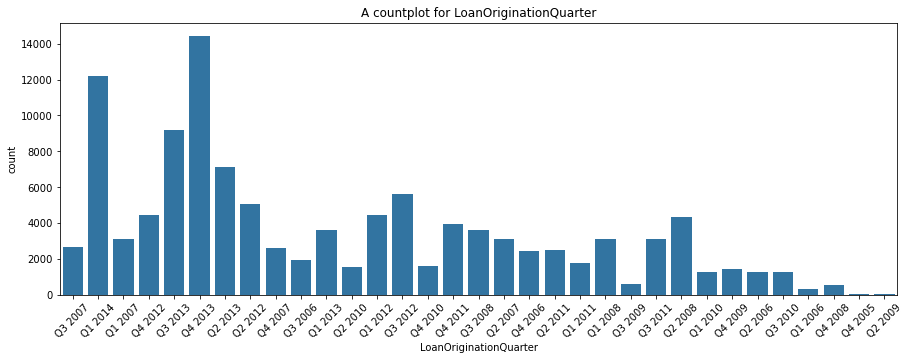

In [96]:
# A countplot for 'LoanOriginationQuarter' 

plt.figure(figsize=[15, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'LoanOriginationQuarter', color = default_color)
plt.xticks(rotation =45)
plt.title('A countplot for LoanOriginationQuarter')
plt.show()

The data distribution revealed that in the 4th quater of 2013 and the 1st quater of 2014, there were very high counts of loan application; generally, there were very high counts of loan application in the whole of 2013 and also in 2014.

> 5. Exploring the various states of residence of the borrowers at the time of listing

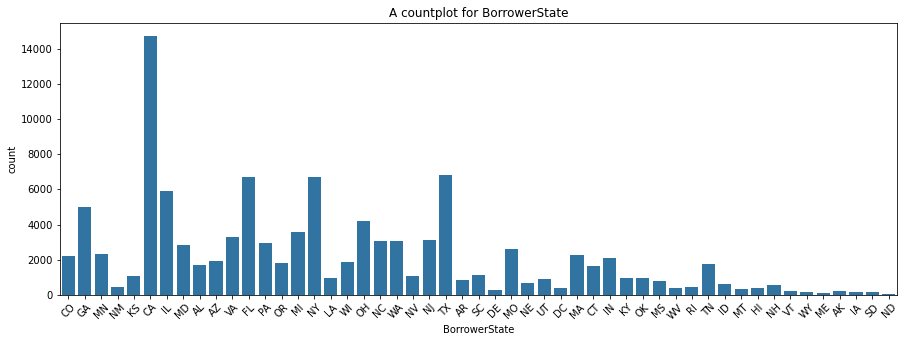

In [97]:
# A countplot for 'BorrowerState' 

plt.figure(figsize=[15, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'BorrowerState', color = default_color)
plt.xticks(rotation =45)
plt.title('A countplot for BorrowerState')
plt.show()


The chart reveals that the state with the highest loan application count is Califonia, having a count of over 14,000, and this is really worth noting, although the fact that Califonia happens to be the state with the largest population in USA could obviously be a major factor. This will further be explored.


> 6. Lastly in this section, I would like to explore the distribution of my main variable of interest: the 'ListingCategory (numeric)' 

In [98]:
loan['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

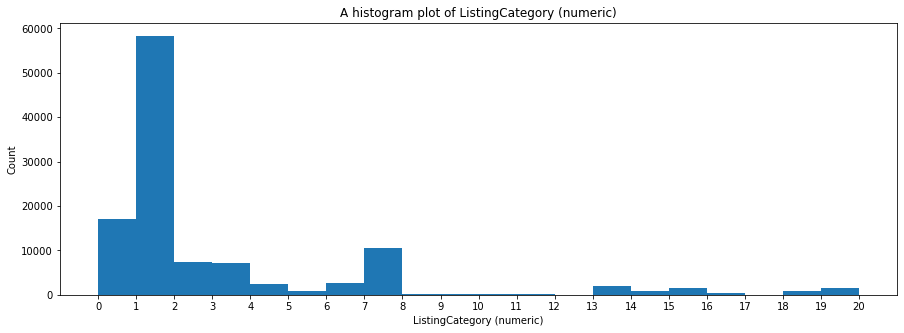

In [99]:
# A histogram plot of 'ListingCategory (numeric)' variable

plt.figure(figsize=[15, 5])
bins = np.arange(0, loan['ListingCategory (numeric)'].max()+1, 1)
plt.hist(loan['ListingCategory (numeric)'], bins=bins)
plt.title('A histogram plot of ListingCategory (numeric)')
plt.xticks(bins)
plt.xlabel('ListingCategory (numeric)')
plt.ylabel('Count')
plt.show()

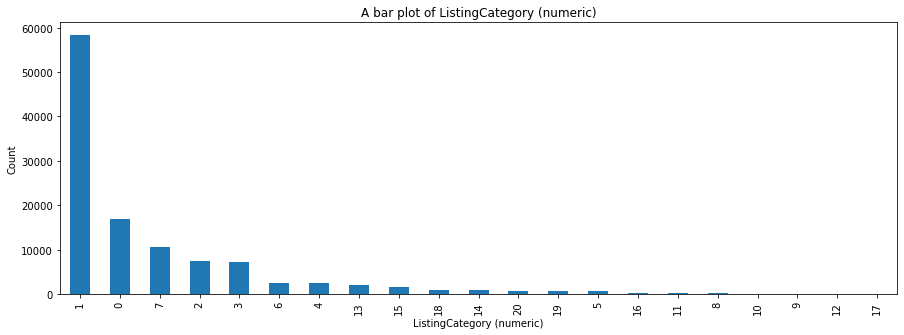

In [100]:
# A bar plot of 'ListingCategory (numeric)' variable

plt.figure(figsize=[15, 5])
loan['ListingCategory (numeric)'].value_counts().plot(kind='bar')
plt.title('A bar plot of ListingCategory (numeric)')
plt.xlabel('ListingCategory (numeric)')
plt.ylabel('Count')
plt.show();

The listing category consists of numbers (1-20) representing various reasons why people take out loans; this is actually a major point of interest for me.

Both the bar and histogram plots reveal a unimodal plot, a massive peak value count was observed, indicating that the number '1' (which represented 'Debt Consolidation') on the listing category, was the most reason for loan collection, owning a very huge count of about 58,000 amongst others.

The massive spike in reason1 (debt consolidation) amongst others really picks my interest, and I would love to further explore this category.

First I would subset the entire dataset and produce a dataset having just reason1 (debt consolidation) in the 'ListingCategory (numeric)' column section.

In [101]:
reason1 = loan1[loan1['ListingCategory (numeric)'] == 1]
reason1.sample(3)

,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationQuarter,AvgCreditScore
20716,1,AZ,Executive,Employed,0.22,"$100,000+",25000.000000,15000,Q4 2013,709.5
14984,1,CA,Clerical,Employed,0.24,"$50,000-74,999",4899.333333,13000,Q4 2013,649.5
11596,1,IL,Nurse (RN),Employed,0.32,"$75,000-99,999",6666.666667,25000,Q1 2014,689.5


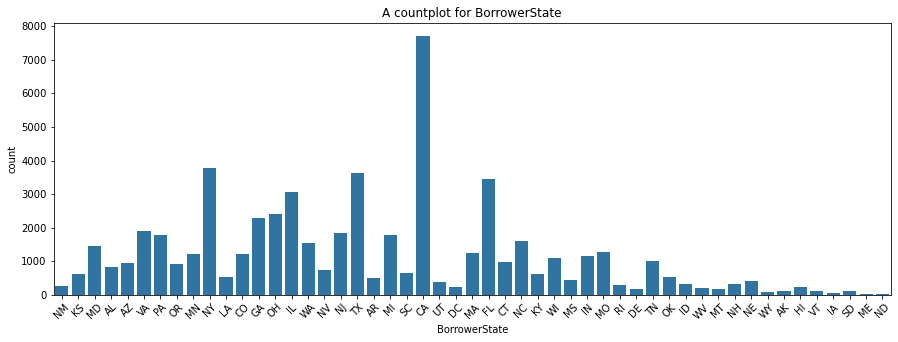

In [102]:
# Next is exploring the 'BorrowerState' category in this new dataset

# A countplot for 'BorrowerState' 

plt.figure(figsize=[15, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = reason1, x = 'BorrowerState', color = default_color)
plt.xticks(rotation =45)
plt.title('A countplot for BorrowerState')
plt.show()

After subsetting the entire dataset to produce a dataset having just reason1 (debt consolidation) in the 'ListingCategory (numeric)' column section, the plot above reveals Califonia (CA) as the state with the highest number of counts in the 'BorrowerState' category, but this massive count could as well be due to the fact that Califonia is highly populated.

This will further explored.

In [103]:
print(reason1['BorrowerState'].value_counts().head(2))
print( )
print(f"The total count of states in the BorrowerState category is: {reason1['BorrowerState'].value_counts().sum()}")
print( )
print(f"This implies that Califonia holds {(7707/58294)*100}% of the total Debt Consolidation count in the BorrowerState category which comprises of 51 states.")

CA    7707
NY    3781
Name: BorrowerState, dtype: int64

The total count of states in the BorrowerState category is: 58294

This implies that Califonia holds 13.220914673894397% of the total Debt Consolidation count in the BorrowerState category which comprises of 51 states.


Comparing this result to the total Califonia count in the original loan dataset analyzed earlier:

In [104]:
print(loan['BorrowerState'].value_counts().head(2))
print( )
print(f"The total Califonia count in the original loan dataset analyzed earlier was {14717}")

CA    14717
TX     6842
Name: BorrowerState, dtype: int64

The total Califonia count in the original loan dataset analyzed earlier was 14717


In [105]:
print(f"The ratio of Califonia count in 'reason1' dataset to the original dataset becomes {(7707/14717)*100}%")

The ratio of Califonia count in 'reason1' dataset to the original dataset becomes 52.36800978460284%


#### This amazing discovery from the above analysis implies that out of the 20 reasons why persons in Califonia took out loan, a whooping 52% (according to this dataset) was due to 'Debt Consolidation'.

#### Now let us see if any other state matches this 52%
To do this, I'll create a new dataframe consisting of just counts of debt consolidation and the original data for the various states and find find the ratio between the debt consolidation count to the original count

In [106]:
# Creating a dataframe for debt consolidation count
DebtConsolidation = pd.DataFrame(reason1['BorrowerState'].value_counts())
DebtConsolidation = DebtConsolidation.rename_axis('states').reset_index()
DebtConsolidation.rename(columns={'BorrowerState':'DebtConsolidationCount'}, inplace=True)

# Creating a dataframe for original borrower state count
Original = pd.DataFrame(loan['BorrowerState'].value_counts())
Original = Original.rename_axis('states').reset_index()
Original.rename(columns={'BorrowerState':'OriginalCount'}, inplace=True)

# Merging the both dataframes and appending a new column (a ratio of the both counts)
RatioData = DebtConsolidation.merge(Original, on = 'states' )
RatioData['Ratio'] = (RatioData['DebtConsolidationCount'])/(RatioData['OriginalCount'])

# Checking for the state with the highest ratio
RatioData[RatioData['Ratio']==RatioData['Ratio'].max()]

,states,DebtConsolidationCount,OriginalCount,Ratio
44,SD,129,189,0.68254


#### From the above analysis, the state with the highest ratio is South Dakota (SD) with 68% (surpassing Califonia with about 12%); this implies that 68% of persons from South Dakota took out loan during this period for the purpose of Debt Consolidation.

#### This revealed that Califonia didn't have the highest percent of debt consolidation applications amongst the other states, and that most of it's count were due to it's population

#### Next, I'll focus on states with high debt consolidation ratio and will further be explored in the bivariate exploration section; most importantly to explore relationships, try to figure out why a vast majority or percentage of persons in these states apply for debt consolidation loan

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> An interesting point was that "debt consolidation" was the most reason for loan collection among the states; and in this category, Califonia initially had the highest count, but further analysis revealed that the state with the highest debt consolidation ratio was South Dakota (SD) with 68% (surpassing Califonia with about 12%); which meant that the reason for Califonia having a high count initially was due to its massive population.

> More so, in some explorations in this section, I performed a bit of transformation (transforming plot axes). I had to employ a logarithmic scale to blow up any axis (where necessary), and make them more visible (zoomed in) in order to get the best analysis

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Well, not quite. I only had to drop off some columns that I thought were not of help to my investigation, then I took the average of the upper and lower credit scores and appended it to the new data frame in order to make analysis of the credit scores abit easier.

## Bivariate Exploration

> In this section, I'll be investigating relationships between pairs of variables in my
data that has somewhat been introduced in the previous section (univariate exploration).

> 7. First I'll like to visualize relationship between the states and thier debt consolidation ratio from the RatioData dataframe as anlyzed previously (and lastly) in the univariate section above

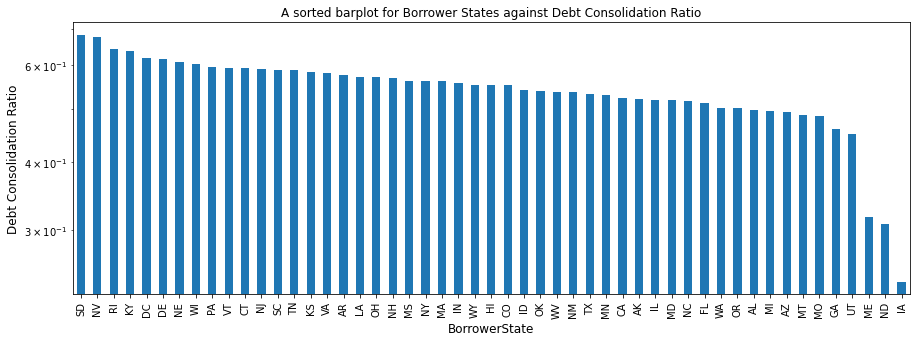

In [107]:
# A barplot for 'BorrowerState' against 'Debt Consolidation Ratio'

plt.figure (figsize=(15,5))
RatioData.groupby('states')['Ratio'].mean().sort_values().sort_values(ascending=False).plot(kind='bar')
plt.xlabel ('BorrowerState', fontsize=12)
plt.ylabel ('Debt Consolidation Ratio', fontsize=12)
plt.yscale('log')
plt.title('A sorted barplot for Borrower States against Debt Consolidation Ratio')
plt.show()

As previously analyzed and as depicted in the plot above, the state with the highest ratio is South Dakota (SD) with 68%, while the state with the least ratio is Iowa (IA) with 24%.

This implies that during this period, 68% of persons from South Dakota took out loan for the purpose of Debt Consolidation, while in Iowa, the percentage of persons that took out loan for the purpose of debt consolidation was recorded to be 24%, which was the least amongst the other states.

> 8. Next on my list will be to explore any relationship between the DebtToIncomeRatio and the StatedMonthlyIncome using a scatter plot

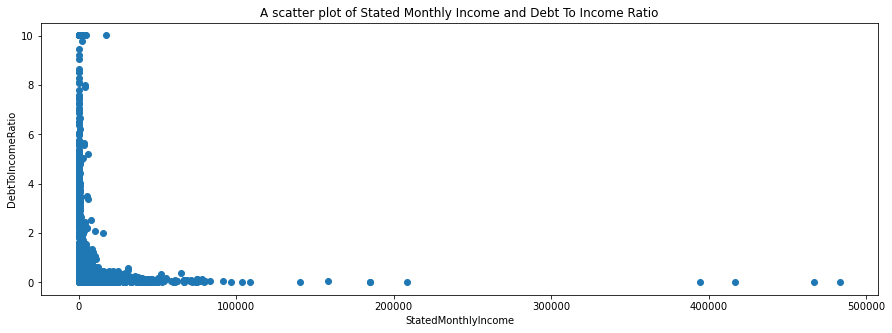

In [108]:
# A scatter plot of Stated Monthly Income and Debt To Income Ratio

plt.figure(figsize=[15, 5])
plt.scatter(data = loan, x = 'StatedMonthlyIncome', y = 'DebtToIncomeRatio')
plt.title('A scatter plot of Stated Monthly Income and Debt To Income Ratio')
plt.xlabel ('StatedMonthlyIncome')
plt.ylabel ('DebtToIncomeRatio')
plt.show()

The chart displays some what of an inverse relationship between the 'debt to income ratio' and 'stated monthly income' of the loan applicants, implying that the 'high earners' tend to have a more reduced (and favorable) 'debt to income ratio', and those earning extremely low tend to have a high 'debt to income ratio' (which is not so good and favorable for loan applications).

> 9. Exploring relationship between IncomeRange of loan applicants and their DebtToIncomeRatio using a bar chart

In [109]:
loan.groupby('IncomeRange')['DebtToIncomeRatio'].mean().sort_values()

IncomeRange
$100,000+         0.180597
$75,000-99,999    0.213700
$50,000-74,999    0.245651
$25,000-49,999    0.278874
Not displayed     0.297033
$1-24,999         0.736972
Not employed      3.328205
$0                     NaN
Name: DebtToIncomeRatio, dtype: float64

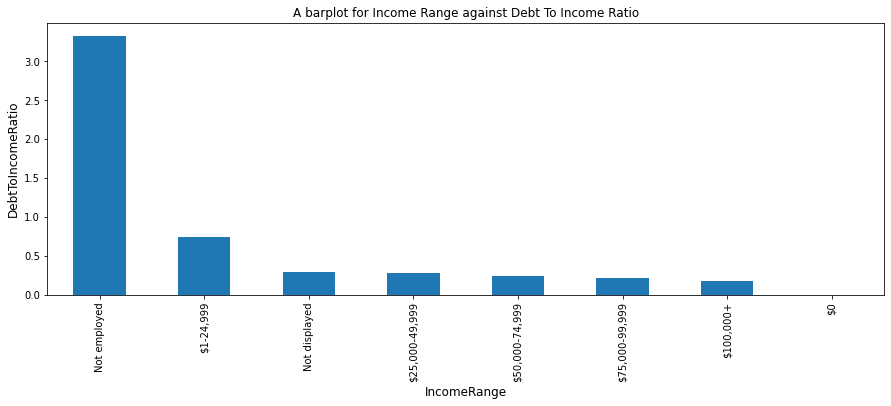

In [110]:
# A barplot for 'IncomeRange' against 'DebtToIncomeRatio'

plt.figure (figsize=(15,5))
loan.groupby('IncomeRange')['DebtToIncomeRatio'].mean().sort_values().sort_values(ascending=False).plot(kind='bar')
plt.xlabel ('IncomeRange', fontsize=12)
plt.ylabel ('DebtToIncomeRatio', fontsize=12)
plt.title('A barplot for Income Range against Debt To Income Ratio')
plt.show()

The plot above reveals that there exists a kind of inverse relationship between the various income range and their "debt to income ratio"; those within a higher income range tend to have the lowest "debt to income ratio", and those within a lower income range tend to have a higher "debt to income ratio", with the unemployed having the highest "debt to income ratio".

This indicates that persons that are within a higher income range tend to borrow way less than they earn; those  earning lower tend to borrow a bit more in order to meet up (but not more than they earn); and then those who are unemployed tend to borrow for survival while earning little or nothing, and hence they have the highest "debt to income ratio".

> 10. Exploring relationship between EmploymentStatus of loan applicants and their DebtToIncomeRatio using a clustered bar chart

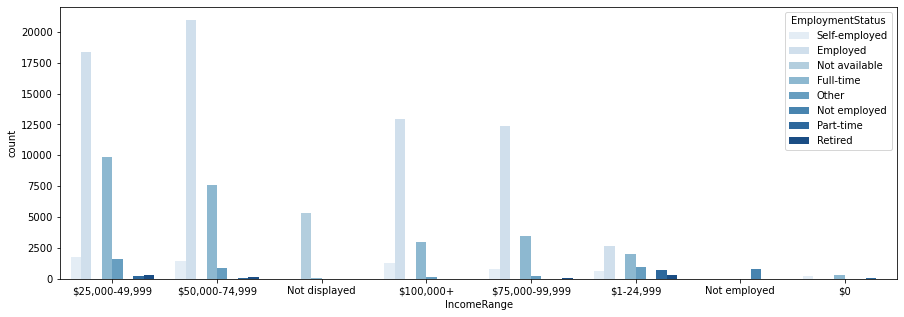

In [111]:
plt.figure(figsize = [15, 5])

sb.countplot(data = loan, x = 'IncomeRange', hue = 'EmploymentStatus', palette = 'Blues')
plt.show()

The plot above reveals that for the various income range, the "employed" category had the highest count, hence the category of persons that earn the most (in terms of count) within each income range are the employed persons 

> 11. What is the nature of the loan dataset with regards to 'DebtToIncomeRatio' and 'AvgCreditScore'?

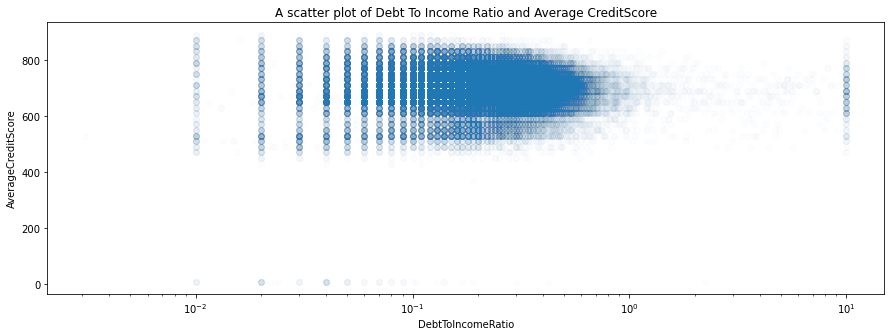

In [112]:
# A scatter plot between two numerical variables : 'DebtToIncomeRatio' and 'AvgCreditScore'

plt.figure(figsize=[15, 5])
plt.scatter(data = loan1, x = 'DebtToIncomeRatio', y = 'AvgCreditScore', alpha=1/100)
# Using a log scale to magnify the x-axis
plt.xscale('log')
plt.title('A scatter plot of Debt To Income Ratio and Average CreditScore')
plt.xlabel ('DebtToIncomeRatio')
plt.ylabel ('AverageCreditScore')

plt.show()

The scatter plot reveals that the data points are more concentrated within 'average credit score' of 500 & 850, and also a 'debt to income ratio' between 0.1 & 0.5; indicating that most persons in the dataset had an 'average credit score' between 500 & 850, and also a 'debt to income ratio' between 0.1 & 0.5

> 12. Exploring relationship between EmploymentStatus of loan applicants and their DebtToIncomeRatio 

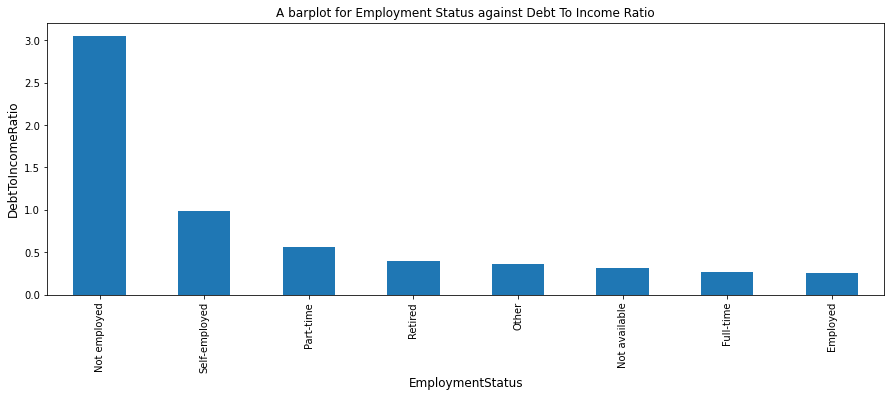

In [113]:
# A barplot for 'EmploymentStatus' against 'DebtToIncomeRatio'

plt.figure (figsize=(15,5))
loan.groupby('EmploymentStatus')['DebtToIncomeRatio'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel ('EmploymentStatus', fontsize=12)
plt.ylabel ('DebtToIncomeRatio', fontsize=12)
plt.title('A barplot for Employment Status against Debt To Income Ratio')
plt.show()

The plot reveals that those that are employed tend to have the lowest (and most favorable) "debt to income ratio" as against the unemployed. This could be attributed to the fact that the employed have a steady source of income.

> 13. What is the distribution of the dataset with regards to 'StatedMonthlyIncome' and 'AvgCreditScore'?

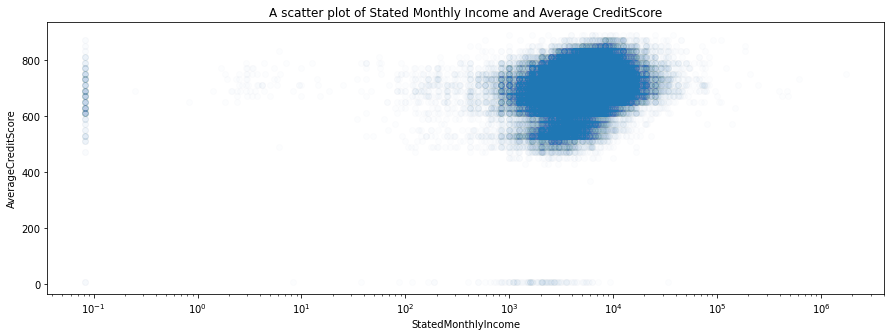

In [114]:
# A scatter plot between two numerical variables : 'StatedMonthlyIncome' and 'AvgCreditScore'

plt.figure(figsize=[15, 5])
plt.scatter(data = loan1, x = 'StatedMonthlyIncome', y = 'AvgCreditScore', alpha=1/100)
# Using a log scale to magnify the x-axis
plt.xscale('log')
plt.title('A scatter plot of Stated Monthly Income and Average CreditScore')
plt.xlabel ('StatedMonthlyIncome')
plt.ylabel ('AverageCreditScore')
plt.show()

The plot indicates that the dataset is highly concentrated at monthly income between 1000 to around 4500 USD, and also an average credit score between 500 and 850

> 14. Exploring the hierarchy of states with respect to their average credit scores
>> what states had the most average credit scores?

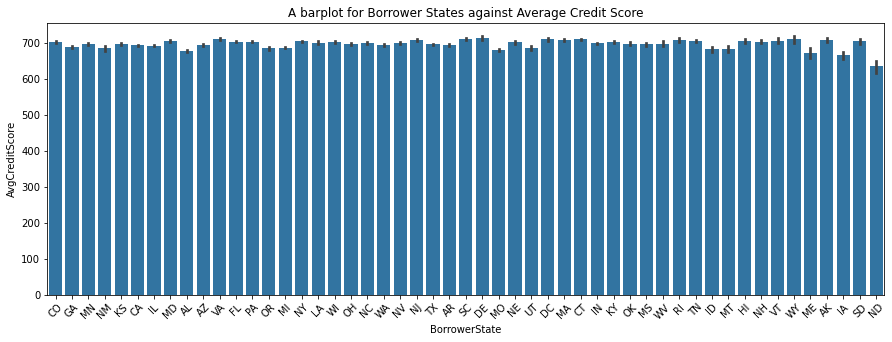

In [115]:
# A barplot for 'BorrowerState' against 'AvgCreditScore'

plt.figure(figsize=[15, 5])
default_color = sb.color_palette()[0]
sb.barplot(data = loan, x = 'BorrowerState', y = 'AvgCreditScore', color = default_color)
plt.xticks(rotation =45)
plt.title('A barplot for Borrower States against Average Credit Score')

plt.show()

Since the difference between the average credit scores of the various states are not so visible from the plot above, I decided to blow up the the y_axis a bit using a log scale:

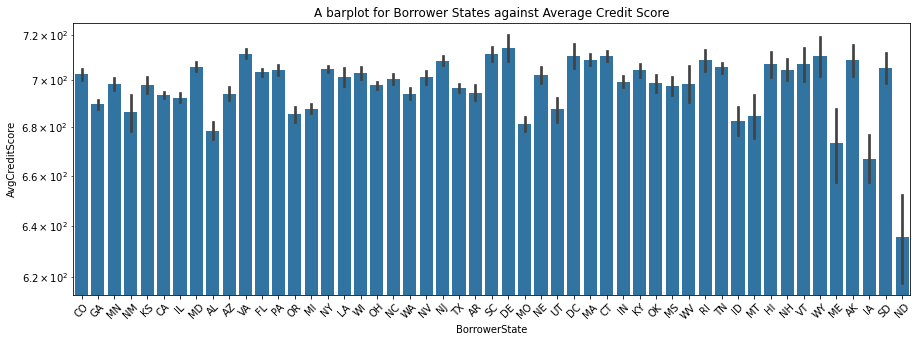

In [116]:
# A barplot for 'BorrowerState' against 'AvgCreditScore'

plt.figure(figsize=[15, 5])
default_color = sb.color_palette()[0]
sb.barplot(data = loan, x = 'BorrowerState', y = 'AvgCreditScore', color = default_color)
plt.xticks(rotation =45)
plt.yscale('log')
plt.title('A barplot for Borrower States against Average Credit Score')
plt.show()


Now, the variances between the states are more visible, what is left is to arrange the states in the order of their magnitude to clearly see the distribution:

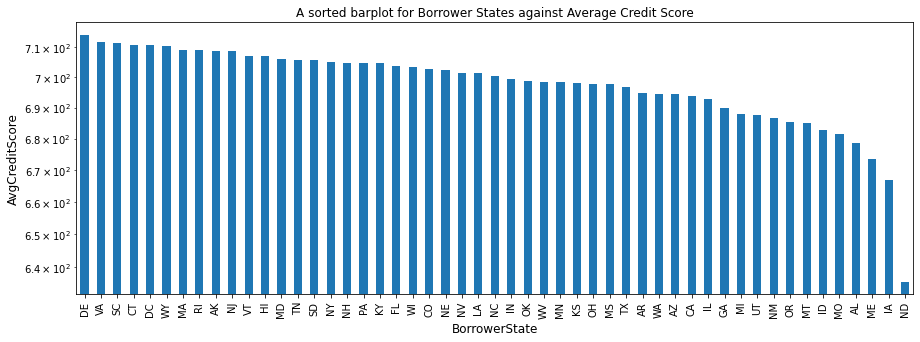

In [117]:
# A barplot for 'BorrowerState' against 'AvgCreditScore'

plt.figure (figsize=(15,5))
loan.groupby('BorrowerState')['AvgCreditScore'].mean().sort_values().sort_values(ascending=False).plot(kind='bar')
plt.xlabel ('BorrowerState', fontsize=12)
plt.ylabel ('AvgCreditScore', fontsize=12)
plt.yscale('log')
plt.title('A sorted barplot for Borrower States against Average Credit Score')
plt.show()

The bar plot above clearly reveals states with the highest and lowest average credit scores. It shows Delaware (DE) as the state with the highest average credit scores, and Nothh Dakota (ND) as the state with the least average credit scores.

The next exploration is going to check for relationship(s) between these average credit scores and debt consolidation ratio of borrower states

> 15. Exploring the relationship between the debt consolidation ratio and average credit scores for the states

In [118]:
# Creating a dataframe of sorted average credit scores for the states

states =loan.groupby('BorrowerState')['AvgCreditScore'].mean().sort_values()
CreditScores = pd.DataFrame(states)
CreditScores = CreditScores.rename_axis('states').reset_index()

# Creating a dataframe of sorted debt consolidation ratio for the states

RatioData = RatioData.sort_values('Ratio', ascending=False)

In [119]:
# Merging both dataframes

CommonStates = CreditScores.merge(RatioData, on = ['states'])
CommonStates.head()

,states,AvgCreditScore,DebtConsolidationCount,OriginalCount,Ratio
0,ND,635.653846,16,52,0.307692
1,IA,666.704301,45,186,0.241935
2,ME,673.460396,32,101,0.316832
3,AL,678.707862,835,1679,0.497320
4,MO,681.385277,1268,2615,0.484895


In [120]:
CommonStates.AvgCreditScore.corr(CommonStates.Ratio)

0.8058752801147675

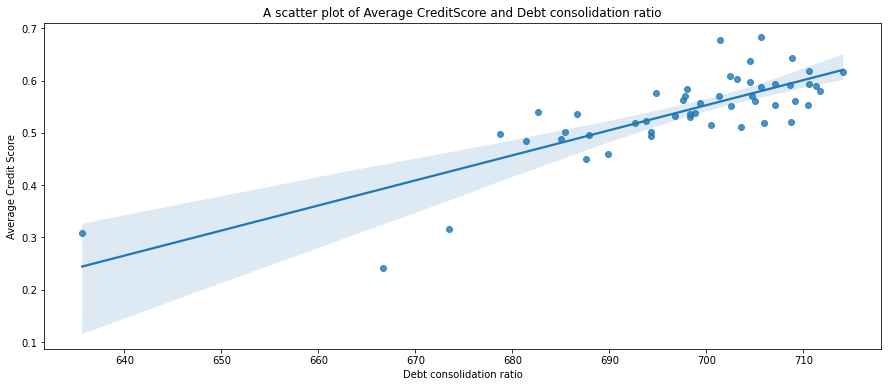

In [121]:
# A scatter plot of Average CreditScore and Debt consolidation ratio

plt.figure(figsize = [15, 6])
ax = sb.regplot(x="AvgCreditScore", y="Ratio", data=CommonStates)
plt.title('A scatter plot of Average CreditScore and Debt consolidation ratio')
plt.xlabel ('Debt consolidation ratio')
plt.ylabel ('Average Credit Score')
plt.show()

#### The scatterplot and analysis above reveals that there appears to be some what of a direct relationship (with a strong correlation of about 80%) between the "Debt consolidation ratio" and "Average credit scores", which might be an indication that for the 'Borrower states', an increase in "Debt consolidation ratio" gives rise to an increase in "Average credit scores"  

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The first interesting fact I observed from my analysis and plots was that 68% of persons from South Dakota took out loan for the purpose of Debt Consolidation, while in Iowa, the percentage of persons that took out loan for the purpose of debt consolidation was recorded to be 24%, which was the least amongst the other states.

> More so, the bivariate exploration between income range and "debt to income ratio" of the borrowers revealed that persons that are within a higher income range tend to borrow way less than they earn; those earning lower tend to borrow a bit more in order to meet up (but not more than they earn); and then those who are unemployed tend to borrow for survival while earning little or nothing, and hence they have the highest "debt to income ratio".

> Finally, and the most interesting relationship in this section was exploring the "Debt consolidation ratio" and "Average credit scores" of the borrower states using a scatterplot, which revealed that there appeared to be some what of a direct relationship (with a strong correlation of about 80%) between the "Debt consolidation ratio" and "Average credit scores", which might be an indication that for the 'Borrower states', an increase in "Debt consolidation ratio" gives rise to an increase in "Average credit scores"

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Exploring the 'average credit scores' and 'debt to income ratio' of the borrowers via a scatter plot revealed that the data points were more concentrated within 'average credit score' of 500 & 850, and also a 'debt to income ratio' between 0.1 & 0.5; indicating that most persons in the dataset had an 'average credit score' between 500 & 850, and also a 'debt to income ratio' between 0.1 & 0.5

> Lastly, a bar plot clearly revealed Delaware (DE) as the state with the highest average credit scores, and Nothh Dakota (ND) as the state with the least average credit scores.

## Multivariate Exploration



> 16.  Exploring relationship between "income range", "average credit scores" and "employment status"

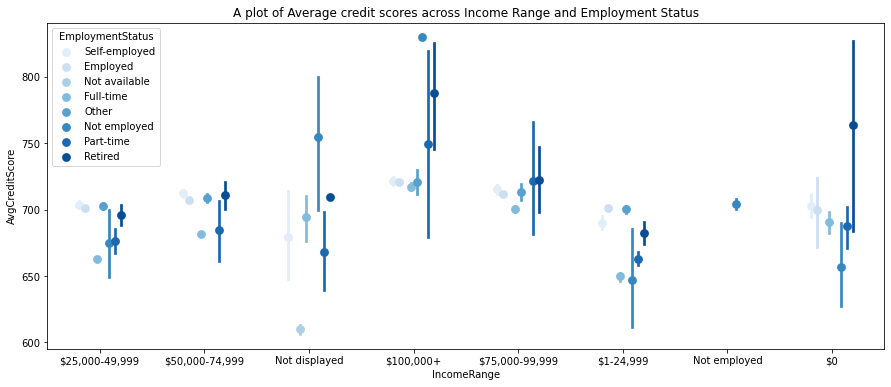

In [122]:
# A plot of Average credit scores across Income Range and Employment Status

fig = plt.figure(figsize = [15,6])
ax = sb.pointplot(data = loan1, x = 'IncomeRange', y = 'AvgCreditScore', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('A plot of Average credit scores across Income Range and Employment Status')
ax.set_yticklabels([],minor = True)
plt.show();

The plot above reveals a relationship between average credit score, income range and employment status. It goes on to reveal that those earning within the income range of 100K USD and above tend to have the highest average credit score, with the retired and 'not employed' topping that income range category.

> 17. Further exploration on "income range", "average credit scores" and "employment status"

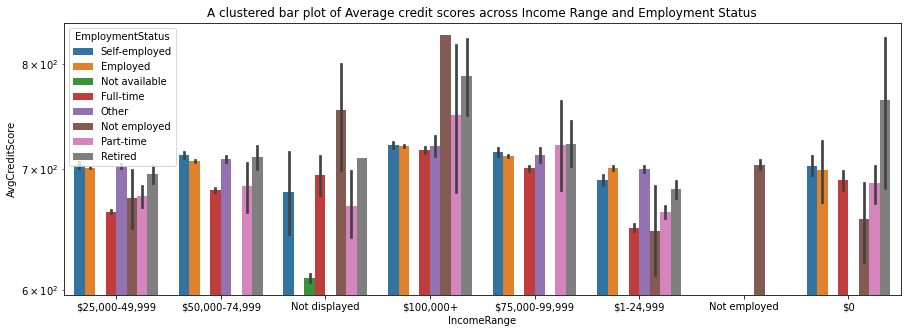

In [123]:
# A clustered bar plot of Average credit scores across Income Range and Employment Status

plt.figure(figsize = [15, 5])

sb.barplot(data = loan1, x = 'IncomeRange', hue = 'EmploymentStatus', y= 'AvgCreditScore')
plt.title('A clustered bar plot of Average credit scores across Income Range and Employment Status')
plt.yscale('log')
plt.show()

Having a closer look, on average, the retired persons in each employment category tend to have the highest average credit scores. 

> 18. Exploring relationship between "debt to income ratio", "income range" and "employment status"

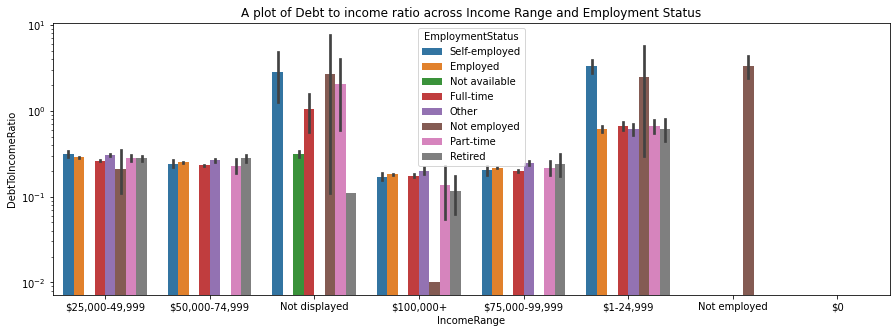

In [124]:
# A plot of Debt to income ratio across Income Range and Employment Status

plt.figure(figsize = [15, 5])

sb.barplot(data = loan1, x = 'IncomeRange', hue = 'EmploymentStatus', y= 'DebtToIncomeRatio')
plt.title('A plot of Debt to income ratio across Income Range and Employment Status')
plt.yscale('log')
plt.show()

Interestingly, the clustered plot above also reveals that those earning within the income range of 100K USD and above tend to have the least (and most favorable) 'debt to income ratio'.

A closer look, on average, further reveals that the retired persons in each employment category tend to have the least (and most favorable) 'debt to income ratio'.

#### This goes to infer that the retired persons are more likely to get loans due to the fact that they usually tend to have a favorable 'debt to income ratio' and high credit scores.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> A point plot was used to explore the relationship between average credit score, income range and employment status. It went on to reveal that those earning within the income range of 100K USD and above tend to have the highest average credit score, with the retired and 'not employed' topping that income range category.

> More so, a clustered plot above also reveals that those earning within the income range of 100K USD and above tend to have the least (and most favorable) 'debt to income ratio', and further analysis revealed that the retired persons in each employment category tend to have the least (and most favorable) 'debt to income ratio'.

### Were there any interesting or surprising interactions between features?

> The both observations inferred that retired persons are more likely to get loans due to the fact that they usually tend to have a favorable 'debt to income ratio' and high credit scores.



## Conclusions
> This was quite an interesting dataset to work on. In total, I had **18 INSIGHTS** from my explorations. But before I began my exploration, I had certian features I wanted to explore, getting clarity on major reason(s) why people take loan, their categories or states, and major contributing factors that facilitate loans, so I had to drop off some columns that I thought were not of help to my investigation, then I took the average of the upper and lower credit scores and appended it to the new data frame in order to make analysis of the credit scores abit easier.

> Moving on, during exploration, I had to transform some plot axes for more visibility and better analysis

> Lastly, below are my major findings:
> 1. The major reason why people took out loan was for the purpose of debt consolidation, and this was most common in South Dakota. More so, there appeared to be some what of a direct relationship (with a strong correlation of about 80%) between the "Debt consolidation ratio" and "Average credit scores", which might be an indication that for the 'Borrower states', an increase in "Debt consolidation ratio" gives rise to an increase in "Average credit scores". This could probably be one of the reasons why debt consolidation was the major reason why people took out loan (as revealed by the dataset)

> 2. The retired persons are more likely to get loans due to the fact that they usually tend to have a favorable 'debt to income ratio' and high credit scores.